In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [3]:
df = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')

In [4]:
df.shape

(200000, 202)

In [5]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [6]:
df['target'].mean()

0.10049

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_ids = X_train.pop('ID_code')
test_ids = X_test.pop('ID_code')

cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

s = X_train[cat_cols].nunique()

threshold = 3

woe_columns = list(s[s > 3].index)
one_hot_columns = list(s[s <= 3].index)

Categorical columns (0): []
Numerical columns (200): ['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_9

In [8]:
X_corr = X_train.copy()
X_corr['target'] = y_train

In [9]:
%%time

corr_matrix = X_corr.corr().abs()

CPU times: user 17.5 s, sys: 82.6 ms, total: 17.6 s
Wall time: 17.6 s


In [10]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Find feature pairs with correlation greater than a threshold
threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display highly correlated pairs
if high_corr_pairs:
    print("Highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No feature pairs with correlation above {threshold} found.")

# To remove one feature from each highly correlated pair
# (typically the one with lower correlation with target)
features_to_drop = []
for feat1, feat2, _ in high_corr_pairs:
    # Compare correlation with target
    if abs(X_corr[feat1].corr(y)) < abs(X_corr[feat2].corr(y)):
        features_to_drop.append(feat1)
    else:
        features_to_drop.append(feat2)

# Remove duplicates
features_to_drop = list(set(features_to_drop))
print(f"Features to drop due to high correlation: {features_to_drop}")

No feature pairs with correlation above 0.8 found.
Features to drop due to high correlation: []


In [11]:
vs = pd.DataFrame()
vs.index = list(X_train.columns)

In [42]:
X_train.mean()

var_0      10.682738
var_1      -1.627696
var_2      10.717273
var_3       6.798320
var_4      11.077072
             ...    
var_195    -0.143144
var_196     2.306358
var_197     8.908255
var_198    15.865846
var_199    -3.336450
Length: 200, dtype: float64

In [12]:
vs['mean'] = X_train.mean()
vs['std'] = X_train.std()
vs['median'] = X_train.median()

In [13]:
vs

,mean,std,median
var_0,10.682738,3.038333,10.52825
var_1,-1.627696,4.048081,-1.60270
var_2,10.717273,2.638754,10.58510
var_3,6.798320,2.047802,6.82780
var_4,11.077072,1.623799,11.10650
...,...,...,...
var_195,-0.143144,1.429952,-0.17530
var_196,2.306358,5.457679,2.41825
var_197,8.908255,0.920898,8.88760
var_198,15.865846,3.012891,15.92880


In [14]:
vs['std'].describe(x/100 for x in range(2, 101, 2))

count    200.000000
mean       4.494318
std        3.459326
min        0.007195
2%         0.189898
4%         0.284720
6%         0.369778
8%         0.521216
10%        0.684759
12%        0.774937
14%        0.851575
16%        0.921368
18%        1.064210
20%        1.359633
22%        1.473329
24%        1.615911
26%        1.887240
28%        2.021368
30%        2.248508
32%        2.509897
34%        2.622393
36%        2.756283
38%        2.878473
40%        3.019120
42%        3.113856
44%        3.216045
46%        3.550553
48%        3.821182
50%        3.944095
52%        4.020260
54%        4.156691
56%        4.286864
58%        4.434653
60%        4.589528
62%        4.954121
64%        5.173380
66%        5.408179
68%        5.599110
70%        5.803073
72%        5.947770
74%        6.144529
76%        6.818141
78%        7.439610
80%        7.635649
82%        7.848590
84%        7.939945
86%        8.207425
88%        8.484315
90%        8.677760
92%        9.188416


<Axes: >

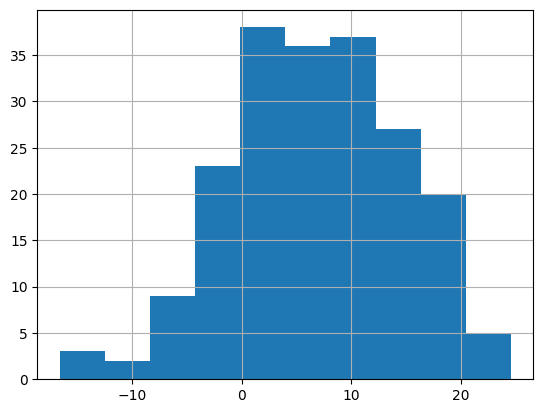

In [15]:
vs['mean'].hist()

In [16]:
!pip install optbinning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 51.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.

In [17]:
import pandas as pd
import numpy as np
from optbinning import OptimalBinning
import matplotlib.pyplot as plt
from optbinning.binning.binning import BinningTable

def create_optimal_bins(
    df, 
    numeric_feature, 
    target, 
    categorical_feature_name=None, 
    max_bins=10, 
    min_bin_size=0.05, 
    special_values=None, 
    show_woe_iv=True
):
    """
    Performs optimal binning on a numerical feature and creates a new categorical feature.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame containing the data
    numeric_feature : str
        The name of the numerical feature to bin
    target : str
        The name of the binary target variable (0/1)
    categorical_feature_name : str, optional
        The name of the new categorical feature to create. 
        If None, will use {numeric_feature}_bin
    max_bins : int, optional
        Maximum number of bins, default is 10
    min_bin_size : float, optional
        Minimum size of each bin as a percentage (0.0-1.0), default is 0.05 (5%)
    special_values : list, optional
        Values to be treated separately (e.g., missing values)
    show_woe_iv : bool, optional
        Whether to display WoE and IV information and plots
        
    Returns:
    --------
    tuple
        (modified_df, binning_table, optb) - The updated DataFrame, the binning table, and the OptimalBinning object
    """
    if categorical_feature_name is None:
        categorical_feature_name = f"{numeric_feature}_bin"
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_result = df.copy()
    
    # Extract the feature and target
    x = df[numeric_feature].values
    y = df[target].values
    
    # Initialize and fit the OptimalBinning object
    optb = OptimalBinning(
        name=numeric_feature,
        dtype="numerical",
        max_n_bins=max_bins,
        min_bin_size=min_bin_size,
        special_values=special_values,
        # Explicitly provide prebinning_kwargs to control what gets passed to DecisionTreeClassifier
        prebinning_kwargs={"random_state": 42}
    )
    optb.fit(x, y)
    
    # Get binning information
    binning_table = optb.binning_table
    
    if show_woe_iv:
        # Display the binning table
        print(f"Binning table for {numeric_feature}:")
        print(binning_table.build())
        
        # Display Information Value
        iv = binning_table.iv
        print(f"\nInformation Value (IV): {iv:.4f}")
        
        # Interpret IV
        if iv < 0.02:
            print("Interpretation: Weak predictor")
        elif iv < 0.1:
            print("Interpretation: Medium predictor")
        elif iv < 0.3:
            print("Interpretation: Strong predictor")
        else:
            print("Interpretation: Very strong predictor")
        
        # Plot WoE and Event Rate
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # WoE plot
        optb.plot(metric="woe", ax=ax1)
        ax1.set_title(f'Weight of Evidence (WoE) for {numeric_feature}')
        ax1.set_ylabel('WoE')
        
        # Event Rate plot
        optb.plot(metric="event_rate", ax=ax2)
        ax2.set_title(f'Event Rate for {numeric_feature}')
        ax2.set_ylabel('Event Rate')
        
        plt.tight_layout()
        plt.show()
    
    # Create the binned feature
    df_result[categorical_feature_name] = optb.transform(x, metric="bins")
    
    # Convert to string for clarity (optional)
    if df_result[categorical_feature_name].dtype != 'object':
        df_result[categorical_feature_name] = df_result[categorical_feature_name].astype(str)
    
    return df_result, binning_table, optb


def calculate_woe_iv_manually(df, feature, target):
    """
    Manually calculate WoE and IV for a categorical feature.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame
    feature : str
        The categorical feature name
    target : str
        The binary target variable name (0/1)
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with bin, count, event_count, non_event_count, event_rate, woe, and iv
    """
    # Group by the feature and calculate counts
    grouped = df.groupby(feature).agg({
        target: ['count', 'sum']
    })
    
    grouped.columns = ['count', 'event_count']
    grouped['non_event_count'] = grouped['count'] - grouped['event_count']
    
    # Calculate totals
    total_events = grouped['event_count'].sum()
    total_non_events = grouped['non_event_count'].sum()
    
    # Calculate percentages
    grouped['pct_events'] = grouped['event_count'] / total_events
    grouped['pct_non_events'] = grouped['non_event_count'] / total_non_events
    
    # Calculate WoE and IV
    grouped['event_rate'] = grouped['event_count'] / grouped['count']
    grouped['woe'] = np.log(grouped['pct_events'] / grouped['pct_non_events'])
    grouped['iv'] = (grouped['pct_events'] - grouped['pct_non_events']) * grouped['woe']
    
    # Calculate total IV
    total_iv = grouped['iv'].sum()
    
    # Reset index for easier access
    result = grouped.reset_index()
    
    print(f"Total Information Value (IV): {total_iv:.4f}")
    return result, total_iv


(CVXPY) Apr 12 09:59:26 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 12 09:59:26 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [18]:
X_corr.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
153248,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,6.8433,0.6589,5.6651,6.5568,11.1473,11.5531,7.3427,-0.0842,12.1997,-15.3646,6.2595,3.4733,13.0607,0.2135,-10.7129,6.7462,7.9575,12.3231,15.2905,6.9028,8.1259,8.2786,13.0651,-7.0573,0.8042,-1.4144,4.5904,7.5408,5.4898,22.6662,5.0314,-1.4674,30.6800,0.9894,-1.9919,10.1476,0.0768,7.1550,8.6529,22.0321,5.5587,14.6022,1.9340,15.5740,-16.1919,-10.6353,-3.5609,21.2226,7.0983,16.9833,11.2724,0.6196,-3.3012,7.1083,6.1164,10.5857,7.6751,-0.6888,17.3231,38.4989,0.3197,-1.8338,-12.8622,13.0944,29.7810,1.5517,12.5723,4.9254,13.1096,19.8312,14.1109,11.0454,5.8945,5.1159,1.9047,3.9497,4.3944,7.4109,-0.7563,35.2509,-6.1138,1.2530,45.2935,11.7901,5.2077,11.2461,1.3214,12.7649,11.5355,-2.9932,-7.2103,17.1510,11.3732,0.4499,9.9041,7.0499,-6.9190,-1.9611,11.0662,13.9153,4.5072,7.3267,-2.7169,-0.3915,14.4144,15.7819,8.8884,4.8242,11.0201,-6.6141,3.8594,22.9874,15.8366,6.7619,11.0959,16.4918,14.3613,1.0610,11.8685,-4.1573,27.0787,15.8550,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309,0
67802,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,6.5169,-6.0109,-15.9492,13.4633,10.8967,11.4817,5.8531,-17.0826,9.9710,-5.5354,24.8797,9.6105,12.4841,23.1941,1.1884,5.4974,25.0889,16.1751,13.8542,7.4657,2.1566,9.6682,5.3921,-12.5515,-1.8242,2.8845,7.3799,3.0072,5.5351,6.7005,5.0175,-6.9759,35.1619,0.5474,3.6558,4.7186,26.2312,17.7479,2.5762,17.6092,7.2900,12.0023,4.6233,15.4917,-16.0852,0.0283,0.6900,16.8792,-2.6032,12.7591,9.3410,4.5268,-35.3936,6.8783,12.8642,11.2632,14.3005,1.2372,3.8808,12.1753,2.8357,-1.7214,-13.6862,10.6586,33.0855,1.5357,8.0175,4.4437,6.8451,18.9063,14.0519,18.5169,4.4499,5.4597,2.6370,10.8127,4.0149,5.4787,3.5881,12.7134,-11.2890,-0.2993,13.6128,12.1040,-4.0612,5.7758,3.0587,12.4330,12.2738,0.8

# Modelling

In [19]:
import xgboost as xgb

model = xgb.XGBClassifier()

In [20]:
%%time

model.fit(X_train, y_train)

CPU times: user 52.6 s, sys: 385 ms, total: 53 s
Wall time: 13.4 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
import shap

In [22]:
X_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
153248,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,6.8433,0.6589,5.6651,6.5568,11.1473,11.5531,7.3427,-0.0842,12.1997,-15.3646,6.2595,3.4733,13.0607,0.2135,-10.7129,6.7462,7.9575,12.3231,15.2905,6.9028,8.1259,8.2786,13.0651,-7.0573,0.8042,-1.4144,4.5904,7.5408,5.4898,22.6662,5.0314,-1.4674,30.6800,0.9894,-1.9919,10.1476,0.0768,7.1550,8.6529,22.0321,5.5587,14.6022,1.9340,15.5740,-16.1919,-10.6353,-3.5609,21.2226,7.0983,16.9833,11.2724,0.6196,-3.3012,7.1083,6.1164,10.5857,7.6751,-0.6888,17.3231,38.4989,0.3197,-1.8338,-12.8622,13.0944,29.7810,1.5517,12.5723,4.9254,13.1096,19.8312,14.1109,11.0454,5.8945,5.1159,1.9047,3.9497,4.3944,7.4109,-0.7563,35.2509,-6.1138,1.2530,45.2935,11.7901,5.2077,11.2461,1.3214,12.7649,11.5355,-2.9932,-7.2103,17.1510,11.3732,0.4499,9.9041,7.0499,-6.9190,-1.9611,11.0662,13.9153,4.5072,7.3267,-2.7169,-0.3915,14.4144,15.7819,8.8884,4.8242,11.0201,-6.6141,3.8594,22.9874,15.8366,6.7619,11.0959,16.4918,14.3613,1.0610,11.8685,-4.1573,27.0787,15.8550,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
67802,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,6.5169,-6.0109,-15.9492,13.4633,10.8967,11.4817,5.8531,-17.0826,9.9710,-5.5354,24.8797,9.6105,12.4841,23.1941,1.1884,5.4974,25.0889,16.1751,13.8542,7.4657,2.1566,9.6682,5.3921,-12.5515,-1.8242,2.8845,7.3799,3.0072,5.5351,6.7005,5.0175,-6.9759,35.1619,0.5474,3.6558,4.7186,26.2312,17.7479,2.5762,17.6092,7.2900,12.0023,4.6233,15.4917,-16.0852,0.0283,0.6900,16.8792,-2.6032,12.7591,9.3410,4.5268,-35.3936,6.8783,12.8642,11.2632,14.3005,1.2372,3.8808,12.1753,2.8357,-1.7214,-13.6862,10.6586,33.0855,1.5357,8.0175,4.4437,6.8451,18.9063,14.0519,18.5169,4.4499,5.4597,2.6370,10.8127,4.0149,5.4787,3.5881,12.7134,-11.2890,-0.2993,13.6128,12.1040,-4.0612,5.7758,3.0587,12.4330,12.2738,0.8791,-4.96

In [23]:
%%time
# booster = model.get_booster()
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_train)

CPU times: user 6min 33s, sys: 473 ms, total: 6min 34s
Wall time: 3min 18s


In [24]:
shap.plots.force(explainer.expected_value, shap_values[0])

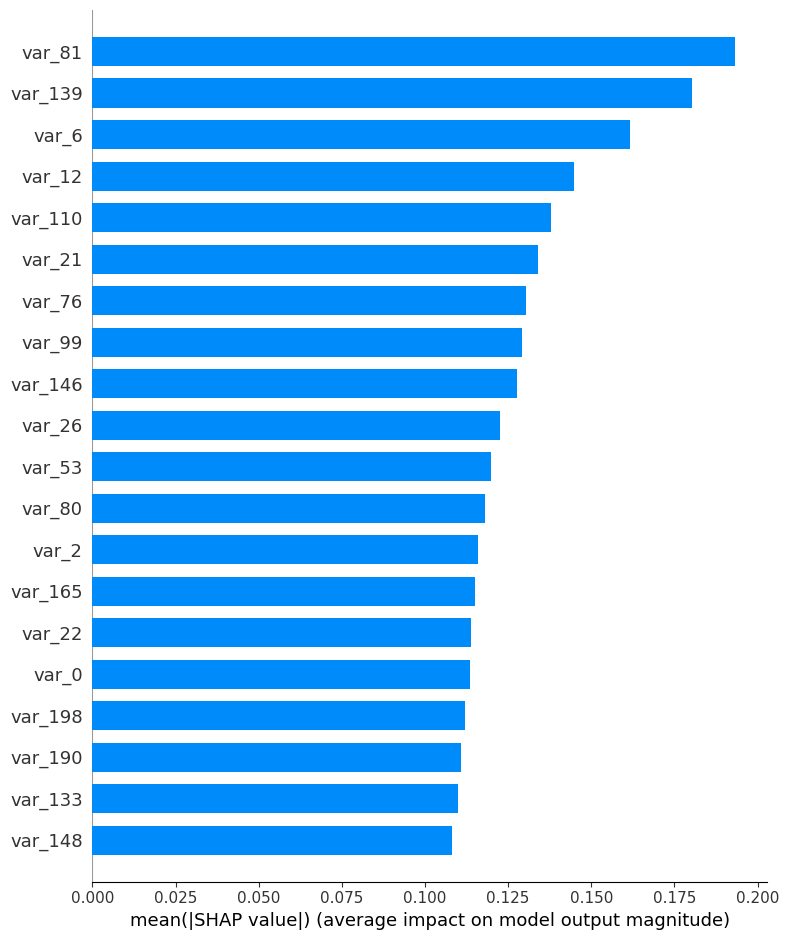

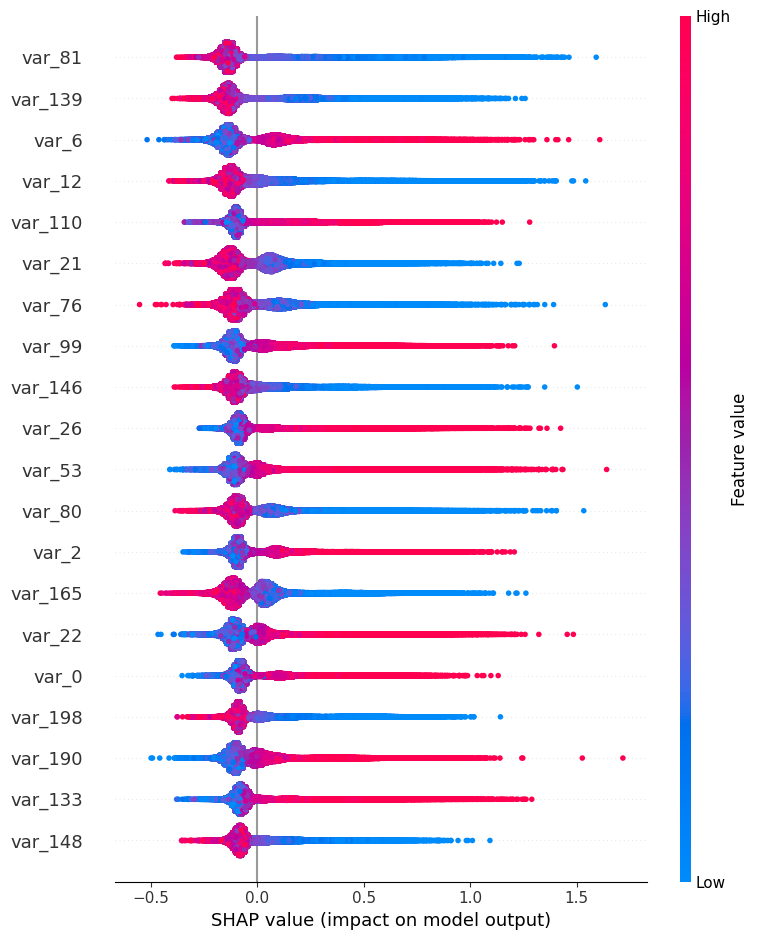

In [25]:
# Summary plot (global importance)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Summary plot (beeswarm - distribution of SHAP values per feature)
shap.summary_plot(shap_values, X_train)

In [26]:
shap_values

array([[-0.05272598, -0.11216091, -0.16311084, ...,  0.07508548,
         0.03084418, -0.00145865],
       [ 0.37809873,  0.01218346, -0.08990733, ...,  0.03409779,
        -0.05121259, -0.0084172 ],
       [-0.10797839, -0.12323663, -0.15255202, ..., -0.05528031,
         0.05715922, -0.02251106],
       ...,
       [ 0.4490375 ,  0.01582826, -0.07925777, ..., -0.01171593,
        -0.02375491, -0.03555471],
       [-0.06966794,  0.77538186,  0.15407705, ...,  0.00616163,
        -0.08676308, -0.00538171],
       [-0.06119688, -0.14091563, -0.05503489, ..., -0.07990308,
         0.08931638,  0.00823874]], dtype=float32)

In [27]:
# For binary classification or regression
feature_importance = pd.DataFrame()
feature_importance['feature'] = X_train.columns
feature_importance['importance'] = np.abs(shap_values).mean(0)  # Average absolute SHAP value
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print all features with their importance scores
feature_importance

,feature,importance
81,var_81,0.193114
139,var_139,0.180307
6,var_6,0.161647
12,var_12,0.144775
110,var_110,0.137796
...,...,...
27,var_27,0.003014
100,var_100,0.003004
42,var_42,0.002407
189,var_189,0.002280


In [28]:
# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum() / feature_importance['importance'].sum()

# Find features needed to reach 95% of total importance
important_features = feature_importance[feature_importance['cumulative_importance'] <= 0.95]['feature'].tolist()
print(f"Number of features to keep: {len(important_features)} out of {len(X_train.columns)}")
print(f"Features to drop: {set(X_train.columns) - set(important_features)}")

Number of features to keep: 136 out of 200
Features to drop: {'var_61', 'var_7', 'var_161', 'var_156', 'var_152', 'var_65', 'var_134', 'var_59', 'var_129', 'var_38', 'var_47', 'var_136', 'var_69', 'var_171', 'var_15', 'var_101', 'var_14', 'var_153', 'var_42', 'var_96', 'var_3', 'var_64', 'var_60', 'var_181', 'var_113', 'var_68', 'var_73', 'var_77', 'var_98', 'var_29', 'var_4', 'var_62', 'var_57', 'var_54', 'var_19', 'var_39', 'var_72', 'var_182', 'var_102', 'var_79', 'var_16', 'var_124', 'var_185', 'var_183', 'var_30', 'var_126', 'var_41', 'var_46', 'var_160', 'var_117', 'var_176', 'var_158', 'var_37', 'var_100', 'var_27', 'var_120', 'var_25', 'var_189', 'var_97', 'var_84', 'var_103', 'var_10', 'var_143', 'var_17'}


In [29]:
!pip install kds

In [30]:
import kds

In [31]:
preds = model.predict_proba(X_test)[:, 1]

In [32]:
preds

array([0.00244419, 0.06431767, 0.01098906, ..., 0.13058452, 0.43190917,
       0.02501391], dtype=float32)

In [33]:
table = kds.metrics.decile_table(y_test, preds, change_deciles=20)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

In [34]:
table

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.402,0.999,0.630,2000.0,1284.0,716.0,204.85,2000,64.20,2000.0,1284.0,2000,716.0,5.0,31.340,48.816,1.994,29.346,6.268
1,2,0.237,0.402,0.310,2000.0,679.0,1321.0,204.85,2000,33.95,4000.0,1963.0,4000,2037.0,10.0,47.913,97.632,5.674,42.239,4.791
2,3,0.159,0.237,0.193,2000.0,490.0,1510.0,204.85,97,24.50,6000.0,2453.0,4097,3547.0,15.0,59.873,100.000,9.879,49.994,3.992
3,4,0.117,0.159,0.136,2000.0,331.0,1669.0,204.85,0,16.55,8000.0,2784.0,4097,5216.0,20.0,67.952,100.000,14.528,53.424,3.398
4,5,0.090,0.116,0.102,2000.0,251.0,1749.0,204.85,0,12.55,10000.0,3035.0,4097,6965.0,25.0,74.079,100.000,19.399,54.680,2.963
5,6,0.071,0.090,0.080,2000.0,201.0,1799.0,204.85,0,10.05,12000.0,3236.0,4097,8764.0,30.0,78.985,100.000,24.410,54.575,2.633
6,7,0.058,0.071,0.064,2000.0,163.0,1837.0,204.85,0,8.15,14000.0,3399.0,4097,10601.0,35.0,82.963,100.000,29.527,53.436,2.370
7,8,0.047,0.058,0.052,2000.0,148.0,1852.0,204.85,0,7.40,16000.0,3547.0,4097,12453.0,40.0,86.576,100.000,34.685,51.891,2.164
8,9,0.039,0.047,0.043,2000.0,100.0,1900.0,204.85,0,5.00,18000.0,3647.0,4097,14353.0,45.0,89.016,100.000,39.977,49.039,1.978
9,10,0.033,0.039,0.036,2000.0,101.0,1899.0,204.85,0,5.05,20000.0,3748.0,4097,16252.0,50.0,91.482,100.000,45.266,46.216,1.830


In [35]:
y_train.mean()

0.10000625

# Imbalanced Learn

In [36]:
!pip install --upgrade scikit-learn==1.3.2 imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 70.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [37]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Create an imbalanced-learn pipeline
imb_pipeline = ImbPipeline(steps=[
    ('undersampler', RandomUnderSampler(random_state=42, sampling_strategy=0.2)),  # Undersampling step
    
    ('classifier', XGBClassifier())  # Your classifier
])

# Then use it as you would use a regular sklearn pipeline
imb_pipeline.fit(X_train, y_train)
predictions = imb_pipeline.predict(X_test)

In [38]:
table_imb = kds.metrics.decile_table(y_train, predictions, change_deciles=20)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

In [39]:
y_test.mean()

0.102425

In [40]:
table_imb

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,1.0,1.0,1.000,2000.0,1190.0,810.0,204.85,2000,59.50,2000.0,1190.0,2000,810.0,5.0,29.046,48.816,2.256,26.790,5.809
1,2,0.0,1.0,0.268,2000.0,411.0,1589.0,204.85,2000,20.55,4000.0,1601.0,4000,2399.0,10.0,39.077,97.632,6.682,32.395,3.908
2,3,0.0,0.0,0.000,2000.0,131.0,1869.0,204.85,97,6.55,6000.0,1732.0,4097,4268.0,15.0,42.275,100.000,11.888,30.387,2.818
3,4,0.0,0.0,0.000,2000.0,146.0,1854.0,204.85,0,7.30,8000.0,1878.0,4097,6122.0,20.0,45.838,100.000,17.051,28.787,2.292
4,5,0.0,0.0,0.000,2000.0,137.0,1863.0,204.85,0,6.85,10000.0,2015.0,4097,7985.0,25.0,49.182,100.000,22.240,26.942,1.967
5,6,0.0,0.0,0.000,2000.0,134.0,1866.0,204.85,0,6.70,12000.0,2149.0,4097,9851.0,30.0,52.453,100.000,27.438,25.015,1.748
6,7,0.0,0.0,0.000,2000.0,155.0,1845.0,204.85,0,7.75,14000.0,2304.0,4097,11696.0,35.0,56.236,100.000,32.577,23.659,1.607
7,8,0.0,0.0,0.000,2000.0,108.0,1892.0,204.85,0,5.40,16000.0,2412.0,4097,13588.0,40.0,58.872,100.000,37.846,21.026,1.472
8,9,0.0,0.0,0.000,2000.0,152.0,1848.0,204.85,0,7.60,18000.0,2564.0,4097,15436.0,45.0,62.582,100.000,42.994,19.588,1.391
9,10,0.0,0.0,0.000,2000.0,147.0,1853.0,204.85,0,7.35,20000.0,2711.0,4097,17289.0,50.0,66.170,100.000,48.155,18.015,1.323


In [41]:
table_imb

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,1.0,1.0,1.000,2000.0,1190.0,810.0,204.85,2000,59.50,2000.0,1190.0,2000,810.0,5.0,29.046,48.816,2.256,26.790,5.809
1,2,0.0,1.0,0.268,2000.0,411.0,1589.0,204.85,2000,20.55,4000.0,1601.0,4000,2399.0,10.0,39.077,97.632,6.682,32.395,3.908
2,3,0.0,0.0,0.000,2000.0,131.0,1869.0,204.85,97,6.55,6000.0,1732.0,4097,4268.0,15.0,42.275,100.000,11.888,30.387,2.818
3,4,0.0,0.0,0.000,2000.0,146.0,1854.0,204.85,0,7.30,8000.0,1878.0,4097,6122.0,20.0,45.838,100.000,17.051,28.787,2.292
4,5,0.0,0.0,0.000,2000.0,137.0,1863.0,204.85,0,6.85,10000.0,2015.0,4097,7985.0,25.0,49.182,100.000,22.240,26.942,1.967
5,6,0.0,0.0,0.000,2000.0,134.0,1866.0,204.85,0,6.70,12000.0,2149.0,4097,9851.0,30.0,52.453,100.000,27.438,25.015,1.748
6,7,0.0,0.0,0.000,2000.0,155.0,1845.0,204.85,0,7.75,14000.0,2304.0,4097,11696.0,35.0,56.236,100.000,32.577,23.659,1.607
7,8,0.0,0.0,0.000,2000.0,108.0,1892.0,204.85,0,5.40,16000.0,2412.0,4097,13588.0,40.0,58.872,100.000,37.846,21.026,1.472
8,9,0.0,0.0,0.000,2000.0,152.0,1848.0,204.85,0,7.60,18000.0,2564.0,4097,15436.0,45.0,62.582,100.000,42.994,19.588,1.391
9,10,0.0,0.0,0.000,2000.0,147.0,1853.0,204.85,0,7.35,20000.0,2711.0,4097,17289.0,50.0,66.170,100.000,48.155,18.015,1.323
